In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import math

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [5]:
nba[nba["fg."].isnull() == True].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,...,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,NaN,...,0,0,0,0,0,0,0,0,2013-2014,2013


In [6]:
nba.pos.value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [7]:
nba.bref_team_id.value_counts().head()

TOT    63
NOP    18
OKC    17
UTA    16
LAC    16
Name: bref_team_id, dtype: int64

In [8]:
nba['ft.'].value_counts().head()

1.000    13
0.500    11
0.750     9
0.667     7
0.000     7
Name: ft., dtype: int64

In [9]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [10]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

In [11]:
avgfg = nba["fg."].mean()
nba["fg."] = nba["fg."].fillna(avgfg) 

avgx3p = nba["x3p."].mean()
nba["x3p."] = nba["x3p."].fillna(avgx3p) 

avgx2p = nba["x2p."].mean()
nba["x2p."] = nba["x2p."].fillna(avgx2p) 

avgefg = nba["efg."].mean()
nba["efg."] = nba["efg."].fillna(avgefg) 

avgft = nba["ft."].mean()
nba["ft."] = nba["ft."].fillna(avgft) 

In [12]:
nba = nba.join(pd.get_dummies(nba['ft.'], prefix='nba', drop_first=True) )

In [124]:
nba.pts.unique()

array([ 171,  265,  362, 1330,  328,   92, 1603,  303,  701,  495,  572,
         38,  477,  564,  810,  436,  525, 2112,   28,  352, 1107,   25,
        401,  280,  930,  112,  240,   22,  170,  150,  660,  558,  738,
        625,  166,  911,  298, 1070,  666,  161,  403, 1249,  217,  573,
          3,   72,  222,  497,  378,  821,  763,    5,   12,  492,  197,
        491, 1042, 1281,  891,  419,  998,    7,  645,  159,   64,   63,
         83,  274,  115,  895, 1089,  587,  878,  136,   43,  225,  485,
        347,  925,  470,  101,  967, 1167,  490,  716,  480,  846,    0,
         71,  257,   68,   47,  527,  338, 1256,  153, 1614,   16,   33,
       1282,  890,  356,  510,   26, 1873,  529,   42,  144, 1394,  357,
        641,   66,  177,   97,  339, 1011, 1791,  717,  286,  202, 1542,
       1095,  511, 1119,  929, 2593,    2,  145, 1560,    6,  214, 1096,
        416,  164,  970,   19,  630,  425,  638, 1068,   39,  273,  174,
        910,  315,  248,  859, 1041, 1457,  258, 17

In [12]:
X = nba.drop(nba.columns[[0,1,3,28,29,30]],axis=1) #deleting season, season_end as they are constants.
#bref_team_id, player were also removed as player is unique and bref_team_id is a ID only, not a player quality.
Y = nba['pts']

In [13]:
X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,136,0.581,142,190,332,43,40,57,71,203
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,119,0.639,102,204,306,38,24,36,39,108
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,67,0.836,94,183,277,40,23,46,63,187


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
kncd = KNeighborsRegressor(n_neighbors = 5)
kncd.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [16]:
pred_test = kncd.predict(X_test)

In [17]:
mean_absolute_error(pred_test, y_test)

50.58896551724138

In [18]:
math.sqrt(mean_squared_error(pred_test, y_test))

81.29486729354974

- Lets try another metric

In [19]:
knc = KNeighborsRegressor(n_neighbors = 5, metric = 'cityblock')
knc.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='cityblock',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
pred_test = knc.predict(X_test)

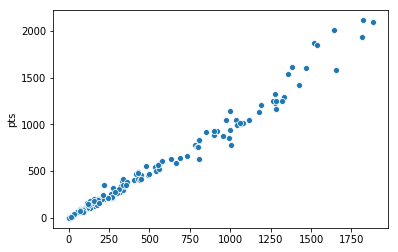

In [21]:
sns.scatterplot(pred_test,y_test)

In [22]:
mean_absolute_error(pred_test, y_test)

44.54344827586206

In [23]:
math.sqrt(mean_squared_error(pred_test, y_test))

78.89273730832261

In [24]:
list(zip(pred_test, y_test))

[(315.8, 280),
 (443.8, 430),
 (135.6, 166),
 (295.8, 261),
 (328.2, 393),
 (22.8, 20),
 (267.4, 211),
 (76.8, 64),
 (419.0, 472),
 (478.8, 558),
 (335.6, 301),
 (1035.8, 1041),
 (179.4, 194),
 (536.6, 548),
 (564.6, 592),
 (1275.4, 1328),
 (449.2, 457),
 (804.0, 820),
 (84.8, 72),
 (783.0, 781),
 (264.8, 257),
 (200.0, 200),
 (156.2, 124),
 (10.2, 6),
 (269.2, 224),
 (633.6, 626),
 (1652.2, 1583),
 (794.8, 759),
 (316.8, 328),
 (76.8, 63),
 (1515.6, 1873),
 (99.6, 107),
 (848.2, 921),
 (735.2, 666),
 (1041.4, 998),
 (336.8, 414),
 (1003.8, 781),
 (276.6, 315),
 (1817.4, 1930),
 (1188.2, 1209),
 (1065.8, 1007),
 (172.8, 144),
 (89.6, 92),
 (113.8, 159),
 (100.6, 102),
 (807.0, 831),
 (152.8, 189),
 (132.0, 109),
 (1824.0, 2112),
 (173.8, 138),
 (158.6, 201),
 (1423.8, 1417),
 (131.8, 178),
 (17.0, 18),
 (16.0, 20),
 (954.8, 871),
 (360.6, 384),
 (349.2, 343),
 (218.8, 352),
 (75.6, 65),
 (1358.8, 1542),
 (9.8, 6),
 (2.2, 0),
 (403.8, 404),
 (430.0, 416),
 (1331.8, 1289),
 (131.6, 150),

- output data is continuous so we have used regressor here.
- by using n_neighbours = 5 and metric = 'cityblock', we are able to optimize the model by reducing the MAE to 44.5 and RMSE to 78.9.